In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

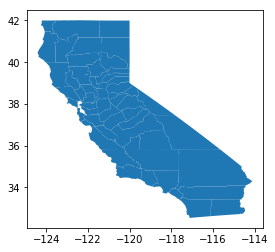

In [4]:
# Read in the CA counties geojson
ca_counties = gpd.read_file('./data/caCountiesNoChannelIslands.geojson')

# Peek at an initial plot of the data frame
ca_counties.plot()

In [5]:
# Check the type of the data frame, which should be a GeoDataFrame
type(ca_counties)

geopandas.geodataframe.GeoDataFrame

In [6]:
ca_counties.head()

,fid,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,1,06,075,00277302,0500000US06075,06075,San Francisco,06,121485107,479107241,"(POLYGON ((-122.514483 37.780829, -122.509843 ..."
1,2,06,111,00277320,0500000US06111,06111,Ventura,06,4773302741,946030569,"(POLYGON ((-119.477837 34.379417, -119.473793 ..."
2,3,06,071,00277300,0500000US06071,06071,San Bernardino,06,51948123813,123845007,"(POLYGON ((-117.802539 33.975551, -117.79111 3..."
3,4,06,043,00277286,0500000US06043,06043,Mariposa,06,3752472156,36225644,"(POLYGON ((-120.394425 37.67504, -120.392504 3..."
4,5,06,103,01692767,0500000US06103,06103,Tehama,06,7638228772,33767784,"(POLYGON ((-123.065426 40.286971, -123.060729 ..."


In [7]:
# Drop a few columns since just trying out a quick and dirty map
ca_counties = ca_counties.drop(['fid','STATEFP','COUNTYFP', 'COUNTYNS','AFFGEOID','GEOID','LSAD','ALAND','AWATER'], axis=1)

In [8]:
ca_counties.head()

,NAME,geometry
0,San Francisco,"(POLYGON ((-122.514483 37.780829, -122.509843 ..."
1,Ventura,"(POLYGON ((-119.477837 34.379417, -119.473793 ..."
2,San Bernardino,"(POLYGON ((-117.802539 33.975551, -117.79111 3..."
3,Mariposa,"(POLYGON ((-120.394425 37.67504, -120.392504 3..."
4,Tehama,"(POLYGON ((-123.065426 40.286971, -123.060729 ..."


In [9]:
# Read in the SLE csv file
sle_data = pd.read_csv('./data/sleCasesByCounty.csv')
sle_data.head()

,County,Human,Mosquito,Chickens
0,Alameda,0,0,0
1,Alpine,0,0,0
2,Amador,0,0,0
3,Butte,0,0,0
4,Calaveras,0,0,0


In [10]:
# Check the type so can see the difference between pandas and geopandas 
type(sle_data)

pandas.core.frame.DataFrame

In [11]:
# Change column names to lowercase for sle_data
sle_data = sle_data.rename(str.lower, axis='columns')
sle_data.head()

,county,human,mosquito,chickens
0,Alameda,0,0,0
1,Alpine,0,0,0
2,Amador,0,0,0
3,Butte,0,0,0
4,Calaveras,0,0,0


In [12]:
# Make ca_counties columns lowercase as well
ca_counties = ca_counties.rename(str.lower, axis='columns')
ca_counties.head()

,name,geometry
0,San Francisco,"(POLYGON ((-122.514483 37.780829, -122.509843 ..."
1,Ventura,"(POLYGON ((-119.477837 34.379417, -119.473793 ..."
2,San Bernardino,"(POLYGON ((-117.802539 33.975551, -117.79111 3..."
3,Mariposa,"(POLYGON ((-120.394425 37.67504, -120.392504 3..."
4,Tehama,"(POLYGON ((-123.065426 40.286971, -123.060729 ..."


In [13]:
# Merge our pandas data frame and our geopandas geo data frame
merged = ca_counties.set_index('name').join(sle_data.set_index('county'))

In [14]:
merged.head()

,geometry,human,mosquito,chickens
name,,,,
San Francisco,"(POLYGON ((-122.514483 37.780829, -122.509843 ...",0,0,0
Ventura,"(POLYGON ((-119.477837 34.379417, -119.473793 ...",0,0,0
San Bernardino,"(POLYGON ((-117.802539 33.975551, -117.79111 3...",0,0,0
Mariposa,"(POLYGON ((-120.394425 37.67504, -120.392504 3...",0,0,0
Tehama,"(POLYGON ((-123.065426 40.286971, -123.060729 ...",0,0,0


In [15]:
# Create a variable to pass to plot for the column we want to visualize
column_to_map = 'mosquito'

In [16]:
# Set the range for the chloropleth. Range in SLE data is 0 - 77
vmin, vmax = 0, 77

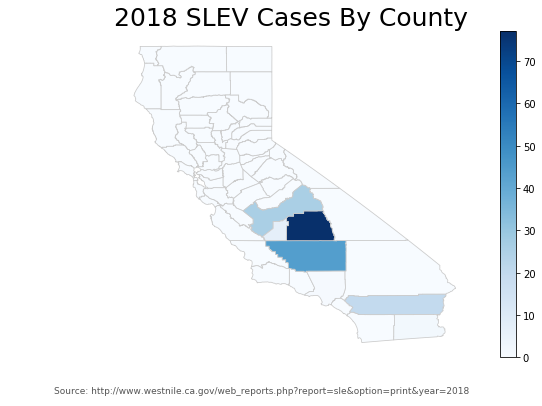

In [43]:
# Create our map with intial creation of empty figure and axes
# Oddly, 'merged.plot(column=column_to_map, cmap='Blues', linewidth=0.8, edgecolor='0.8',ax=ax);' has to be run in the same cell otherwise jupyter thinks there are zero axes
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column=column_to_map, cmap='Blues', linewidth=0.8, edgecolor='0.8',ax=ax);

# No need for the axes with the map
ax.axis('off');

# Add a title
ax.set_title('2018 SLEV Cases By County ', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Add annotation for a data source
ax.annotate('Source: http://www.westnile.ca.gov/web_reports.php?report=sle&option=print&year=2018',xy=(0.1, .05),  xycoords='figure fraction', horizontalalignment='left', 
            verticalalignment='top', fontsize=9, color='#555555');

# Create a variable for a color bar to be used as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# Create an empty array for the color bar which will hold our range of data
sm._A = []

# Then add the color bar to our map
cbar = fig.colorbar(sm)